# 1. Defaine The Problem

## Flight Fare prediction using machine learning
##### In this article, we will be analyzing the flight fare dataset using essential exploratory data analysis techniques then will draw some predictions about the price of the flight based on some features such as what type of airline it is, what is the arrival time, what is the departure time, what is the duration of the flight, source, destination and more.

## Flight Price Prediction(EDA + Feature Engineering)

## Importing Labraries

In [755]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

In [756]:
train_df=pd.read_excel('Data_Train.xlsx')
test_df=pd.read_excel('Test_set.xlsx')

In [757]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [758]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### Exploratory Data Analysis (EDA)  
#### Now here we will be looking at the kind of columns our dataset has.

In [759]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [760]:
test_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [761]:
train_df.shape

(10683, 11)

### To know more about dataset

In [762]:
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [763]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [764]:
test_df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [765]:
# Now while using the isnull function and sum function we will gonna see about the number of null values in our dataset

train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [766]:
#train_df.dropna(inplace=True)

In [767]:
#train_df[train_df.duplicated()].head()

In [768]:
# Here we romove all duplicate and keep one
#train_df.drop_duplicates(keep='first',inplace=True)

In [769]:
train_df.shape

(10683, 11)

In [770]:
test_df.isnull().sum()
# Here We no need to use dropna() method because we can see bellow there is no null value present in this data set.

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

## Data Visualization

C:\Users\DELL\AppData\Local\Temp\ipykernel_32920\2524523741.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Airline',y='Price',data=train_df.sort_values('Price',ascending=False),palette='plasma')


<Axes: xlabel='Airline', ylabel='Price'>

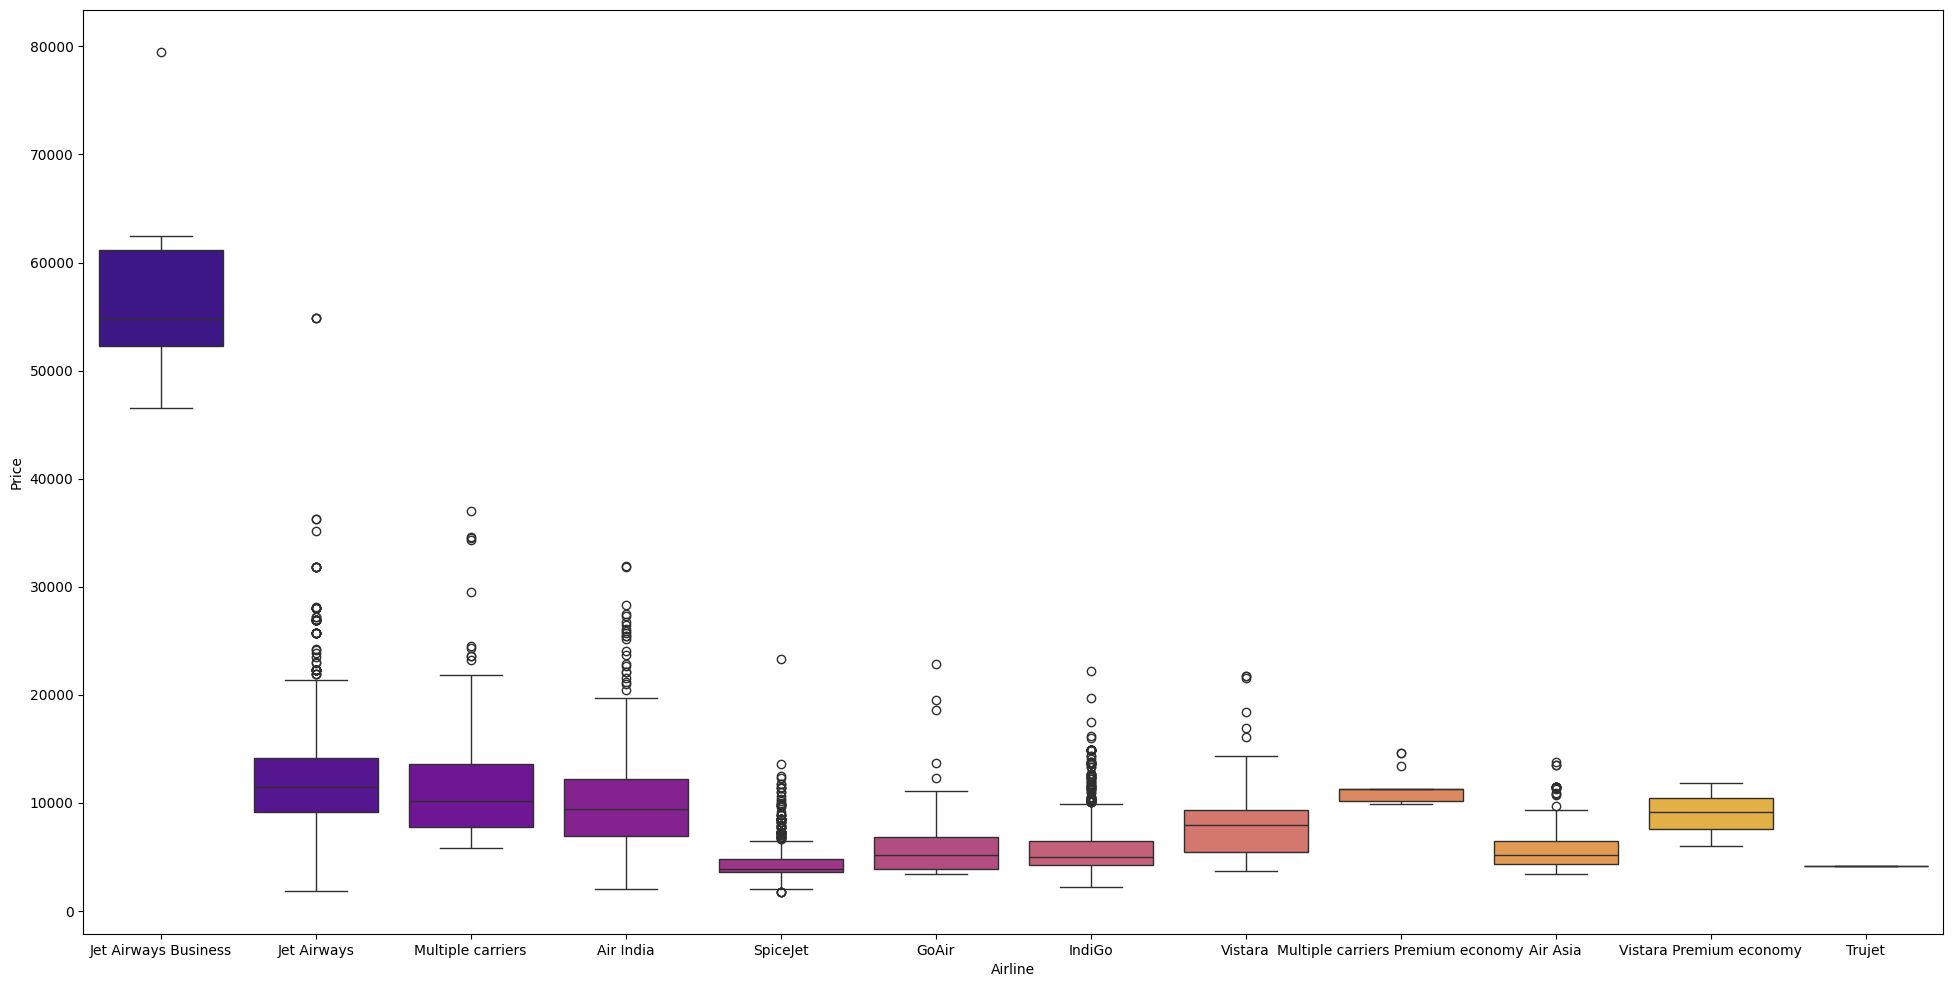

In [771]:
plt.figure(figsize=(24,12))
sns.boxplot(x='Airline',y='Price',data=train_df.sort_values('Price',ascending=False),palette='plasma')


### Observation:
* Here We drew the boxplot to understand the outlier of price which Airline has. 
* here most outlier price for jet Airways

In [772]:
train_df['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [773]:
# OUtliers will be outside of mean+3*std and mean-3*std

print(9026.790289+3*4624.849541)
print(9026.790289-3*4624.849541)

22901.338912
-4847.758333999998


C:\Users\DELL\AppData\Local\Temp\ipykernel_32920\3762299366.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Source',y='Price',data=final_df.sort_values('Price',ascending=False),palette='Set1')


<Axes: xlabel='Source', ylabel='Price'>

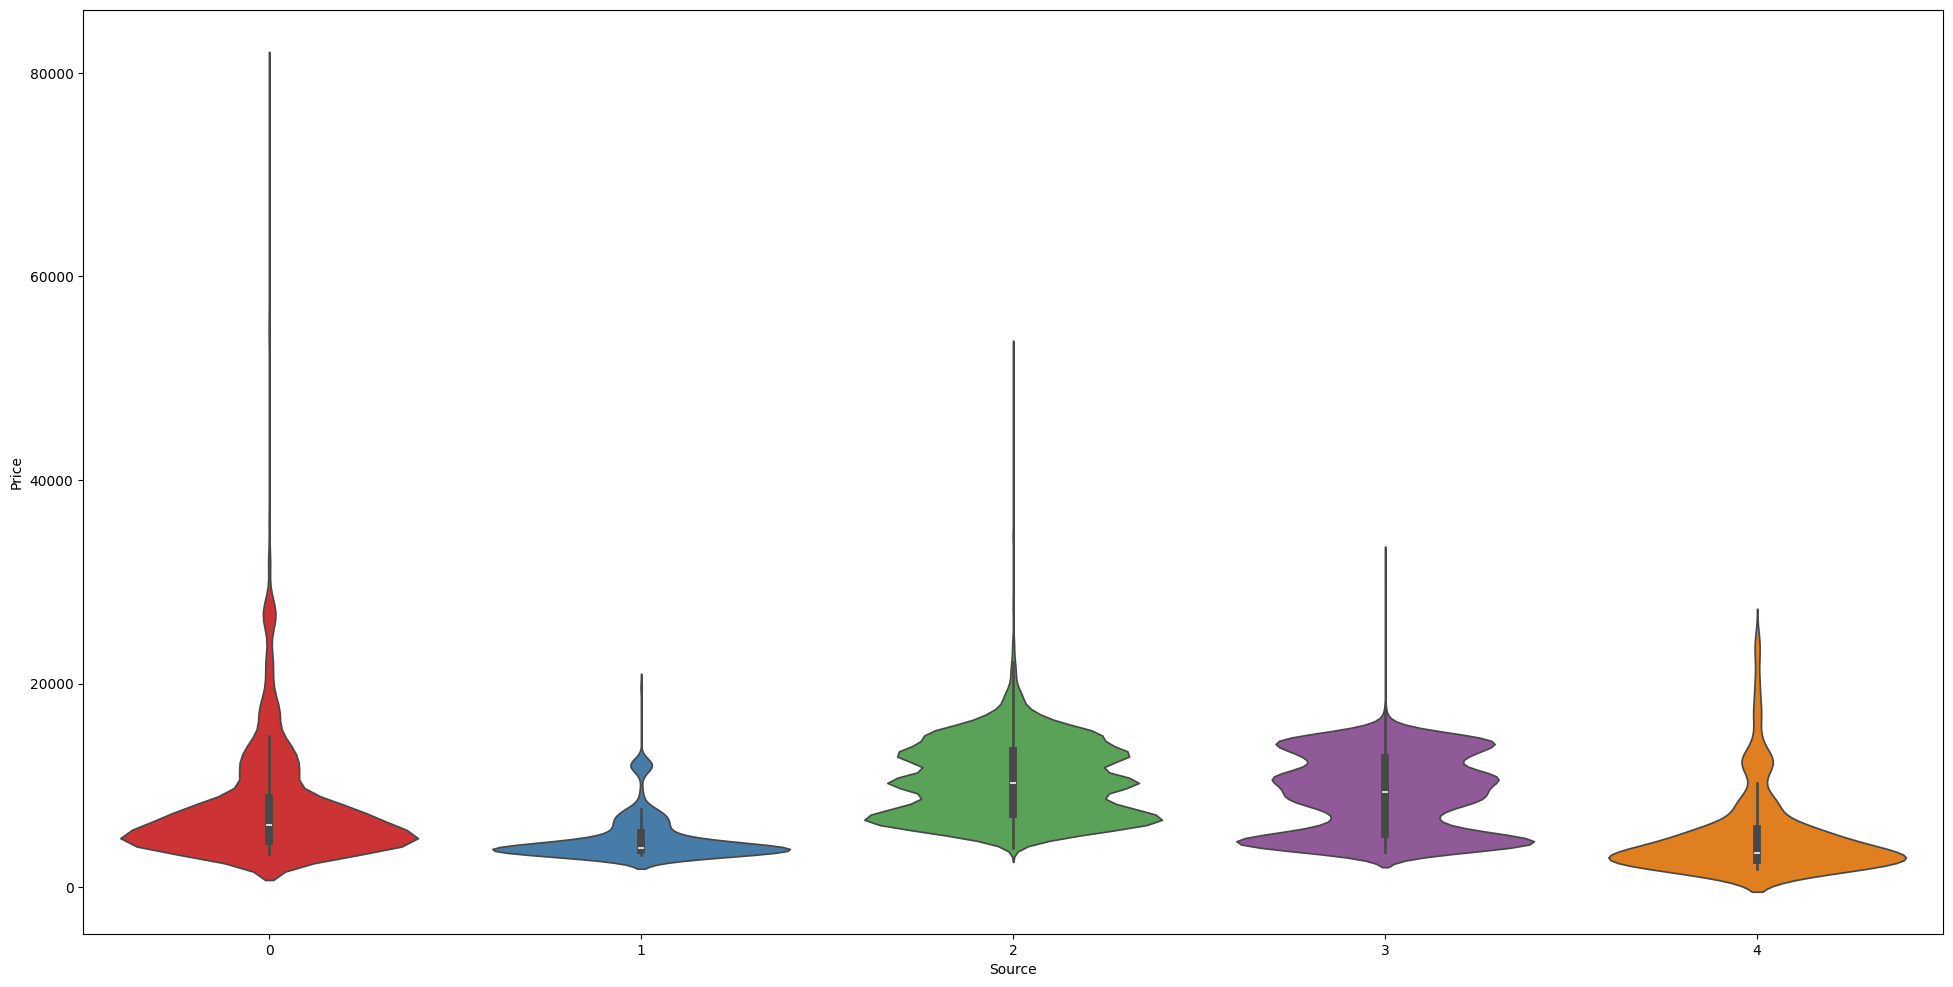

In [774]:
plt.figure(figsize=(24,12))
sns.violinplot(x='Source',y='Price',data=final_df.sort_values('Price',ascending=False),palette='Set1')

### Observation
* Here most outlier price is in Banglore and least is in Chennai.

In [775]:
## WE compine the train and test data set because we easly to clean
final_df=pd.concat([train_df,test_df],ignore_index=True)

In [776]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [777]:
final_df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [778]:
final_df.dropna(inplace=True)

In [779]:
final_df.dropna(inplace=True)

In [780]:
final_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_32920\1242880164.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Destination',y='Price',data=final_df.sort_values('Price',ascending=False),kind='box',height=3,aspect=3,palette='Set1')


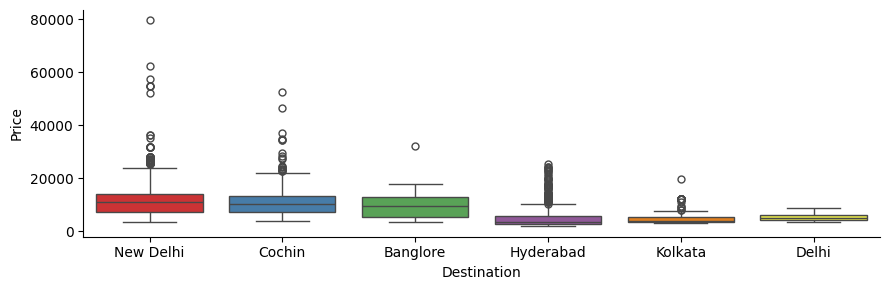

In [781]:
# Plotting Box plot for Price vs Destination
sns.catplot(x='Destination',y='Price',data=final_df.sort_values('Price',ascending=False),kind='box',height=3,aspect=3,palette='Set1')

### inference:
##### We plot with Price and Destination of flight travel using box plot , Here We can understand New Delhi has the most outlier prica and Kolkata has least 

(array([6.028e+03, 4.390e+03, 1.820e+02, 6.600e+01, 7.000e+00, 1.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1759. ,  9534.3, 17309.6, 25084.9, 32860.2, 40635.5, 48410.8,
        56186.1, 63961.4, 71736.7, 79512. ]),
 <BarContainer object of 10 artists>)

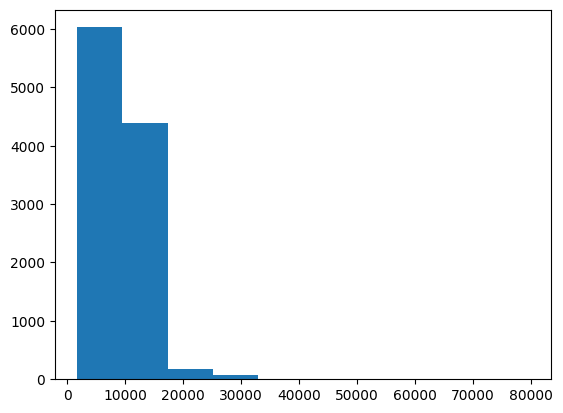

In [782]:
plt.hist(final_df['Price'])

In [783]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [784]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Date_of_Journey  10682 non-null  object 
 2   Source           10682 non-null  object 
 3   Destination      10682 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10682 non-null  object 
 6   Arrival_Time     10682 non-null  object 
 7   Duration         10682 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10682 non-null  object 
 10  Price            10682 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1001.4+ KB


In [785]:

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Date_of_Journey  10682 non-null  object 
 2   Source           10682 non-null  object 
 3   Destination      10682 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10682 non-null  object 
 6   Arrival_Time     10682 non-null  object 
 7   Duration         10682 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10682 non-null  object 
 10  Price            10682 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1001.4+ KB


### Fetaure Engineering Process
Here We create new column name 'Date' ,Month' 'Year' using existing 'column Date_of_journey'

In [786]:
final_df['Date']=final_df['Date_of_Journey'].apply(lambda x:x.split('/')[0])
final_df['Month']=final_df['Date_of_Journey'].apply(lambda x:x.split('/')[1])
final_df['Year']=final_df['Date_of_Journey'].apply(lambda x:x.split('/')[2])

In [787]:
final_df['Month'].head()


0    03
1    05
2    06
3    05
4    03
Name: Month, dtype: object

In [788]:
final_df['Year'].head()

0    2019
1    2019
2    2019
3    2019
4    2019
Name: Year, dtype: object

In [789]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Date_of_Journey  10682 non-null  object 
 2   Source           10682 non-null  object 
 3   Destination      10682 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10682 non-null  object 
 6   Arrival_Time     10682 non-null  object 
 7   Duration         10682 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10682 non-null  object 
 10  Price            10682 non-null  float64
 11  Date             10682 non-null  object 
 12  Month            10682 non-null  object 
 13  Year             10682 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.2+ MB


### We have to convert into integer

In [790]:

final_df['Date']=final_df['Date'].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Year']=final_df['Year'].astype(int)

In [791]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Date_of_Journey  10682 non-null  object 
 2   Source           10682 non-null  object 
 3   Destination      10682 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10682 non-null  object 
 6   Arrival_Time     10682 non-null  object 
 7   Duration         10682 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10682 non-null  object 
 10  Price            10682 non-null  float64
 11  Date             10682 non-null  int32  
 12  Month            10682 non-null  int32  
 13  Year             10682 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.1+ MB


C:\Users\DELL\AppData\Local\Temp\ipykernel_32920\433709024.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Price',data=train_df,palette='plasma')


<Axes: ylabel='Price'>

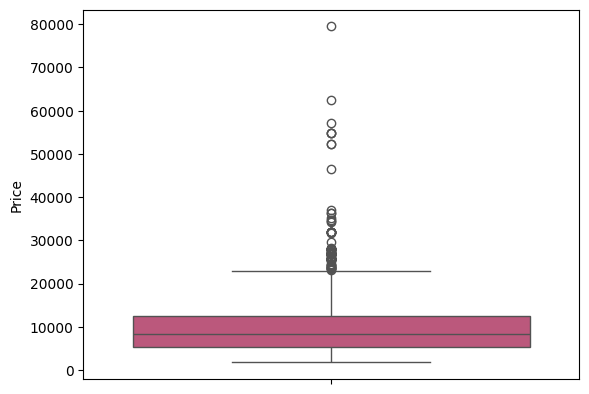

In [792]:
sns.boxplot(y='Price',data=train_df,palette='plasma')

(array([6.028e+03, 4.390e+03, 1.820e+02, 6.600e+01, 7.000e+00, 1.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1759. ,  9534.3, 17309.6, 25084.9, 32860.2, 40635.5, 48410.8,
        56186.1, 63961.4, 71736.7, 79512. ]),
 <BarContainer object of 10 artists>)

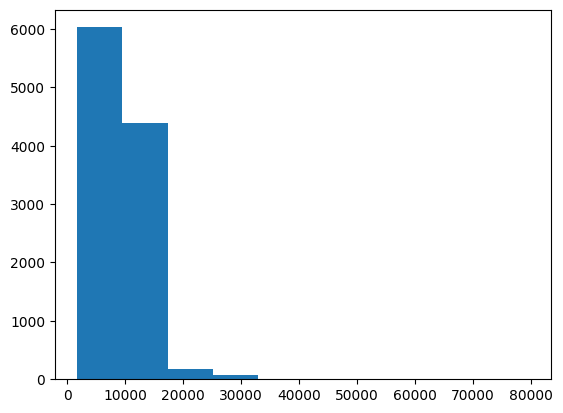

In [793]:
plt.hist(final_df['Price'])

In [794]:
final_df['Price'].describe()

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [795]:
final_df.loc[(final_df['Price']>30000)]['Price']=9026.790289

C:\Users\DELL\AppData\Local\Temp\ipykernel_32920\674033903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.loc[(final_df['Price']>30000)]['Price']=9026.790289


##### We already the column coverted into three column that's why we can remove the column 'Date_of_Journey'

In [796]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)

In [797]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


C:\Users\DELL\AppData\Local\Temp\ipykernel_32920\1351930252.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month',data=final_df,palette=mycolors)


<Axes: title={'center': 'Number of Flight In Each Month'}, xlabel='Month', ylabel='Count'>

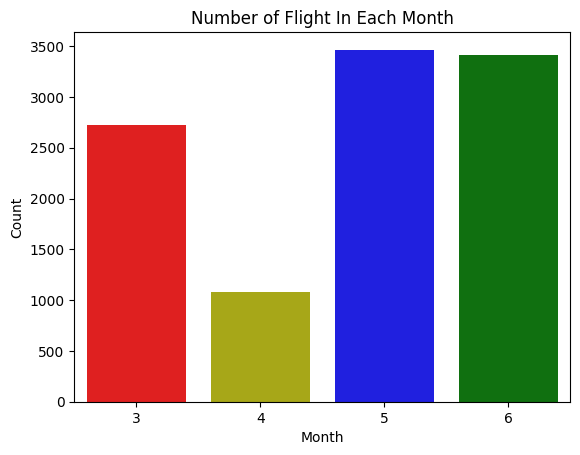

In [798]:
plt.title('Number of Flight In Each Month')
plt.xlabel('Month')
plt.ylabel('Count')
mycolors=['r','y','b','g']
sns.countplot(x='Month',data=final_df,palette=mycolors)

(array([6.029e+03, 4.390e+03, 1.820e+02, 6.600e+01, 7.000e+00, 1.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1759. ,  9534.3, 17309.6, 25084.9, 32860.2, 40635.5, 48410.8,
        56186.1, 63961.4, 71736.7, 79512. ]),
 <BarContainer object of 10 artists>)

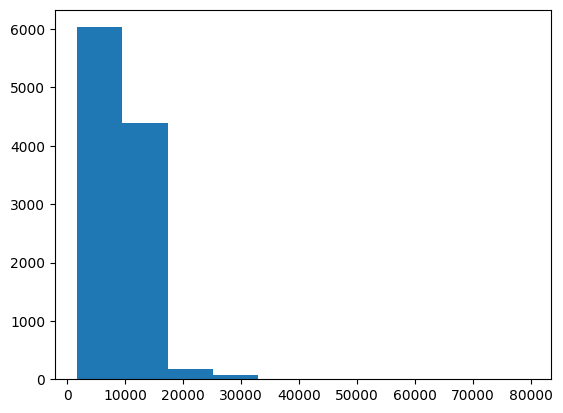

In [799]:
plt.hist(train_df['Price'])

### Inference
##### Here We can understand May has most number of flight 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

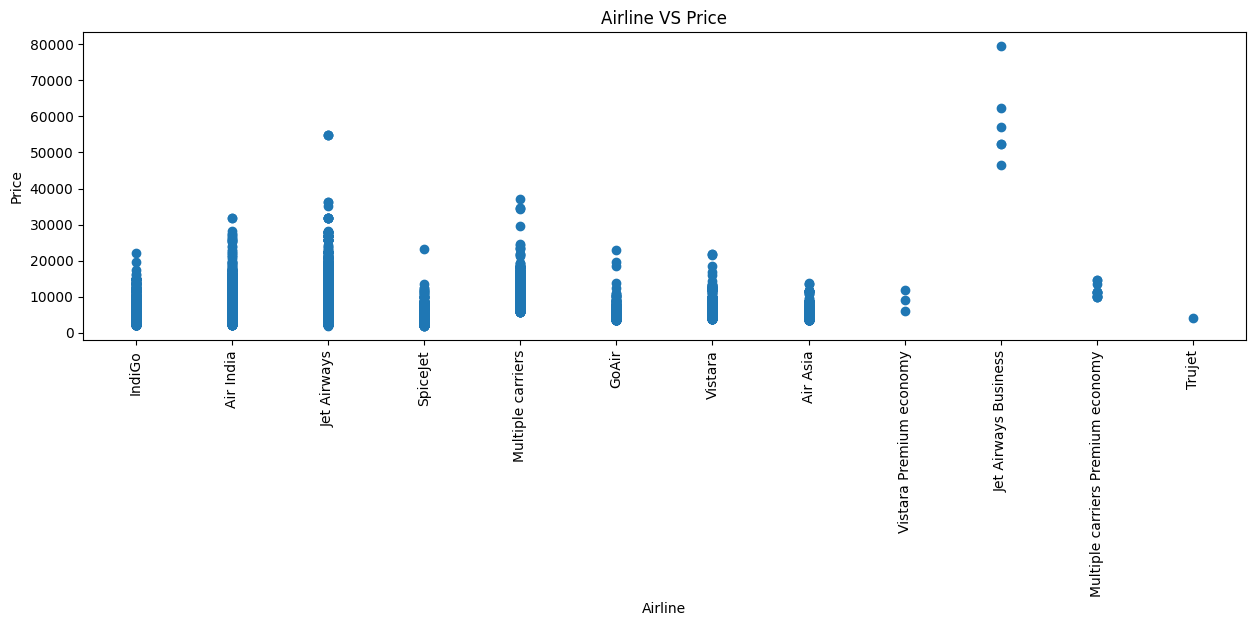

In [800]:
#ploting Airline and Price
plt.figure(figsize=(15,4))
plt.title('Airline VS Price')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.scatter(train_df['Airline'],train_df['Price'])
plt.xticks(rotation=90)

### Inference:
##### Here We can Jet Airways Business has most price outlier and least is Trujet

In [801]:
#Apply feature engneering to 'Arrival_Time' column
final_df['Arrival_Time']=final_df['Arrival_Time'].apply(lambda x:x.split(' ')[0])
#from like this value 01:10 22 Mar,13:15 , we select only this values 01:10,13:15

In [802]:
final_df['Arrival_Time'].head()

0    01:10
1    13:15
2    04:25
3    23:30
4    21:35
Name: Arrival_Time, dtype: object

### Which column has null value

In [803]:
final_df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
dtype: int64

In [804]:
# we create seperate columns'Arrival_hour' and 'Arrival_minute'
final_df['Arrival_hour']=final_df['Arrival_Time'].apply(lambda x:x.split(':')[0])
final_df['Arrival_minute']=final_df['Arrival_Time'].apply(lambda x:x.split(':')[1])

In [805]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


C:\Users\DELL\AppData\Local\Temp\ipykernel_32920\1034595946.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Airline',data=final_df,palette='Set1')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

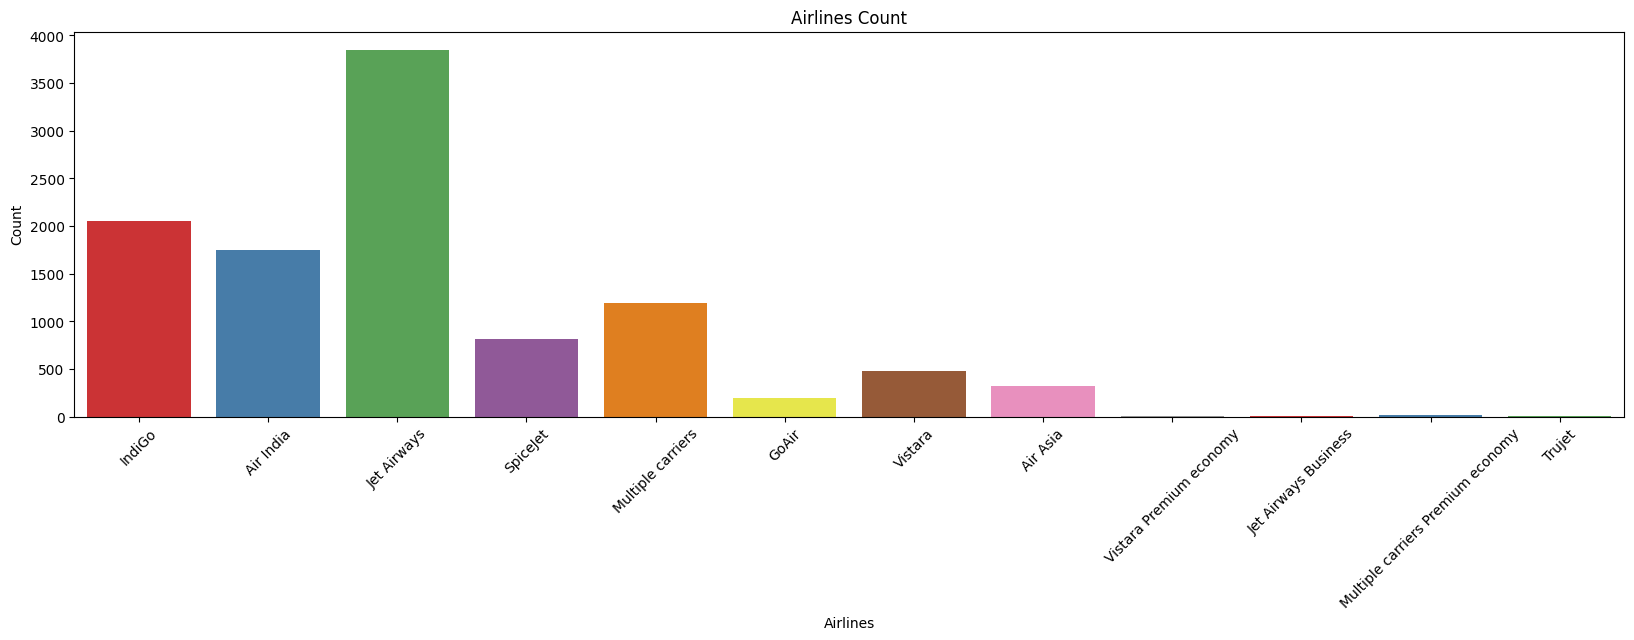

In [806]:
## Ploting count Vs Airlines
plt.figure(figsize = (20,5))
plt.xlabel('Airlines')
plt.ylabel('Count')
plt.title('Airlines Count')
sns.countplot(x='Airline',data=final_df,palette='Set1')
plt.xticks(rotation=45)

Inference: Now from the above graph we can see that between the type pf airline and count of flights we can see that Jet airways has the most flight boarded.

In [807]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Route            10682 non-null  object 
 4   Dep_Time         10682 non-null  object 
 5   Arrival_Time     10682 non-null  object 
 6   Duration         10682 non-null  object 
 7   Total_Stops      10682 non-null  object 
 8   Additional_Info  10682 non-null  object 
 9   Price            10682 non-null  float64
 10  Date             10682 non-null  int32  
 11  Month            10682 non-null  int32  
 12  Year             10682 non-null  int32  
 13  Arrival_hour     10682 non-null  object 
 14  Arrival_minute   10682 non-null  object 
dtypes: float64(1), int32(3), object(11)
memory usage: 1.2+ MB


In [808]:
# we have to convert it into integer type
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int)
final_df['Arrival_minute']=final_df['Arrival_minute'].astype(int)

In [809]:
# Removing Arrival_Time column
final_df.drop('Arrival_Time',axis=1,inplace=True)

* create new columns'Dept_hour'  'Dept_min' from  'Dep_Time'
* Convert the data type into integer
* We remove the old Dep_Time column

In [810]:

final_df['Dept_hour']=final_df['Dep_Time'].apply(lambda x:x.split(':')[0])
final_df['Dept_min']=final_df['Dep_Time'].apply(lambda x:x.split(':')[1])
final_df['Dept_hour']=final_df['Dept_hour'].astype(int)
final_df['Dept_min']=final_df['Dept_min'].astype(int)
final_df.drop('Dep_Time',axis=1,inplace=True)

In [811]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Route            10682 non-null  object 
 4   Duration         10682 non-null  object 
 5   Total_Stops      10682 non-null  object 
 6   Additional_Info  10682 non-null  object 
 7   Price            10682 non-null  float64
 8   Date             10682 non-null  int32  
 9   Month            10682 non-null  int32  
 10  Year             10682 non-null  int32  
 11  Arrival_hour     10682 non-null  int32  
 12  Arrival_minute   10682 non-null  int32  
 13  Dept_hour        10682 non-null  int32  
 14  Dept_min         10682 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.0+ MB


In [812]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [813]:

final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [814]:
#finding number of null value present in this column
final_df['Total_Stops'].isnull().sum()

0

In [815]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_min


#### Encoding

In [816]:

final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'NaN':0,'4 stops':4})

In [817]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50


In [818]:
# We no need the column 'Route' because we have that kind of information in 'Total_Stops' column.
final_df.drop('Route',axis=1,inplace=True)

In [819]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50


In [820]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [821]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Duration         10682 non-null  object 
 4   Total_Stops      10682 non-null  int64  
 5   Additional_Info  10682 non-null  object 
 6   Price            10682 non-null  float64
 7   Date             10682 non-null  int32  
 8   Month            10682 non-null  int32  
 9   Year             10682 non-null  int32  
 10  Arrival_hour     10682 non-null  int32  
 11  Arrival_minute   10682 non-null  int32  
 12  Dept_hour        10682 non-null  int32  
 13  Dept_min         10682 non-null  int32  
dtypes: float64(1), int32(7), int64(1), object(5)
memory usage: 959.7+ KB


### Here We write a function to convert the 	Duration time into minute

In [822]:
## convert the duration into minute
def convert_to_minutes(duration_str):
    parts = duration_str.split()
    total_minutes = 0

    for part in parts:
        if 'h' in part:
            total_minutes += int(part.replace('h', '')) * 60
        elif 'm' in part:
            total_minutes += int(part.replace('m', ''))

    return total_minutes

In [823]:
final_df['duration_in_minutes'] = final_df['Duration'].apply(convert_to_minutes)

In [824]:
final_df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_min,duration_in_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,0,No info,4107.0,9,4,2019,22,25,19,55,150
10679,Air India,Kolkata,Banglore,2h 35m,0,No info,4145.0,27,4,2019,23,20,20,45,155
10680,Jet Airways,Banglore,Delhi,3h,0,No info,7229.0,27,4,2019,11,20,8,20,180
10681,Vistara,Banglore,New Delhi,2h 40m,0,No info,12648.0,1,3,2019,14,10,11,30,160


In [825]:
# We have to remove duration because we have durtion minute column
final_df.drop('Duration',axis=1,inplace=True)

In [826]:
final_df.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Price                  0
Date                   0
Month                  0
Year                   0
Arrival_hour           0
Arrival_minute         0
Dept_hour              0
Dept_min               0
duration_in_minutes    0
dtype: int64

In [827]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_min,duration_in_minutes


In [828]:
final_df.loc[9039,'Total_Stops']=0


In [829]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_min,duration_in_minutes


In [830]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10683 entries, 0 to 9039
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              10682 non-null  object 
 1   Source               10682 non-null  object 
 2   Destination          10682 non-null  object 
 3   Total_Stops          10683 non-null  float64
 4   Additional_Info      10682 non-null  object 
 5   Price                10682 non-null  float64
 6   Date                 10682 non-null  float64
 7   Month                10682 non-null  float64
 8   Year                 10682 non-null  float64
 9   Arrival_hour         10682 non-null  float64
 10  Arrival_minute       10682 non-null  float64
 11  Dept_hour            10682 non-null  float64
 12  Dept_min             10682 non-null  float64
 13  duration_in_minutes  10682 non-null  float64
dtypes: float64(10), object(4)
memory usage: 1.5+ MB


In [831]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet', nan], dtype=object)

### We can encode the  Columns with module LabelEncoder

In [832]:

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [833]:
final_df['Airline']=labelencoder.fit_transform(final_df['Airline'])
final_df['Source']=labelencoder.fit_transform(final_df['Source'])
final_df['Destination']=labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=labelencoder.fit_transform(final_df['Additional_Info'])

In [834]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_min,duration_in_minutes
0,3,0,5,0.0,8,3897.0,24.0,3.0,2019.0,1.0,10.0,22.0,20.0,170.0
1,1,3,0,2.0,8,7662.0,1.0,5.0,2019.0,13.0,15.0,5.0,50.0,445.0
2,4,2,1,2.0,8,13882.0,9.0,6.0,2019.0,4.0,25.0,9.0,25.0,1140.0
3,3,3,0,1.0,8,6218.0,12.0,5.0,2019.0,23.0,30.0,18.0,5.0,325.0
4,3,0,5,1.0,8,13302.0,1.0,3.0,2019.0,21.0,35.0,16.0,50.0,285.0


In [835]:
final_df.shape


(10683, 14)

In [836]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10683 entries, 0 to 9039
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              10683 non-null  int32  
 1   Source               10683 non-null  int32  
 2   Destination          10683 non-null  int32  
 3   Total_Stops          10683 non-null  float64
 4   Additional_Info      10683 non-null  int32  
 5   Price                10682 non-null  float64
 6   Date                 10682 non-null  float64
 7   Month                10682 non-null  float64
 8   Year                 10682 non-null  float64
 9   Arrival_hour         10682 non-null  float64
 10  Arrival_minute       10682 non-null  float64
 11  Dept_hour            10682 non-null  float64
 12  Dept_min             10682 non-null  float64
 13  duration_in_minutes  10682 non-null  float64
dtypes: float64(10), int32(4)
memory usage: 1.3 MB


<Axes: >

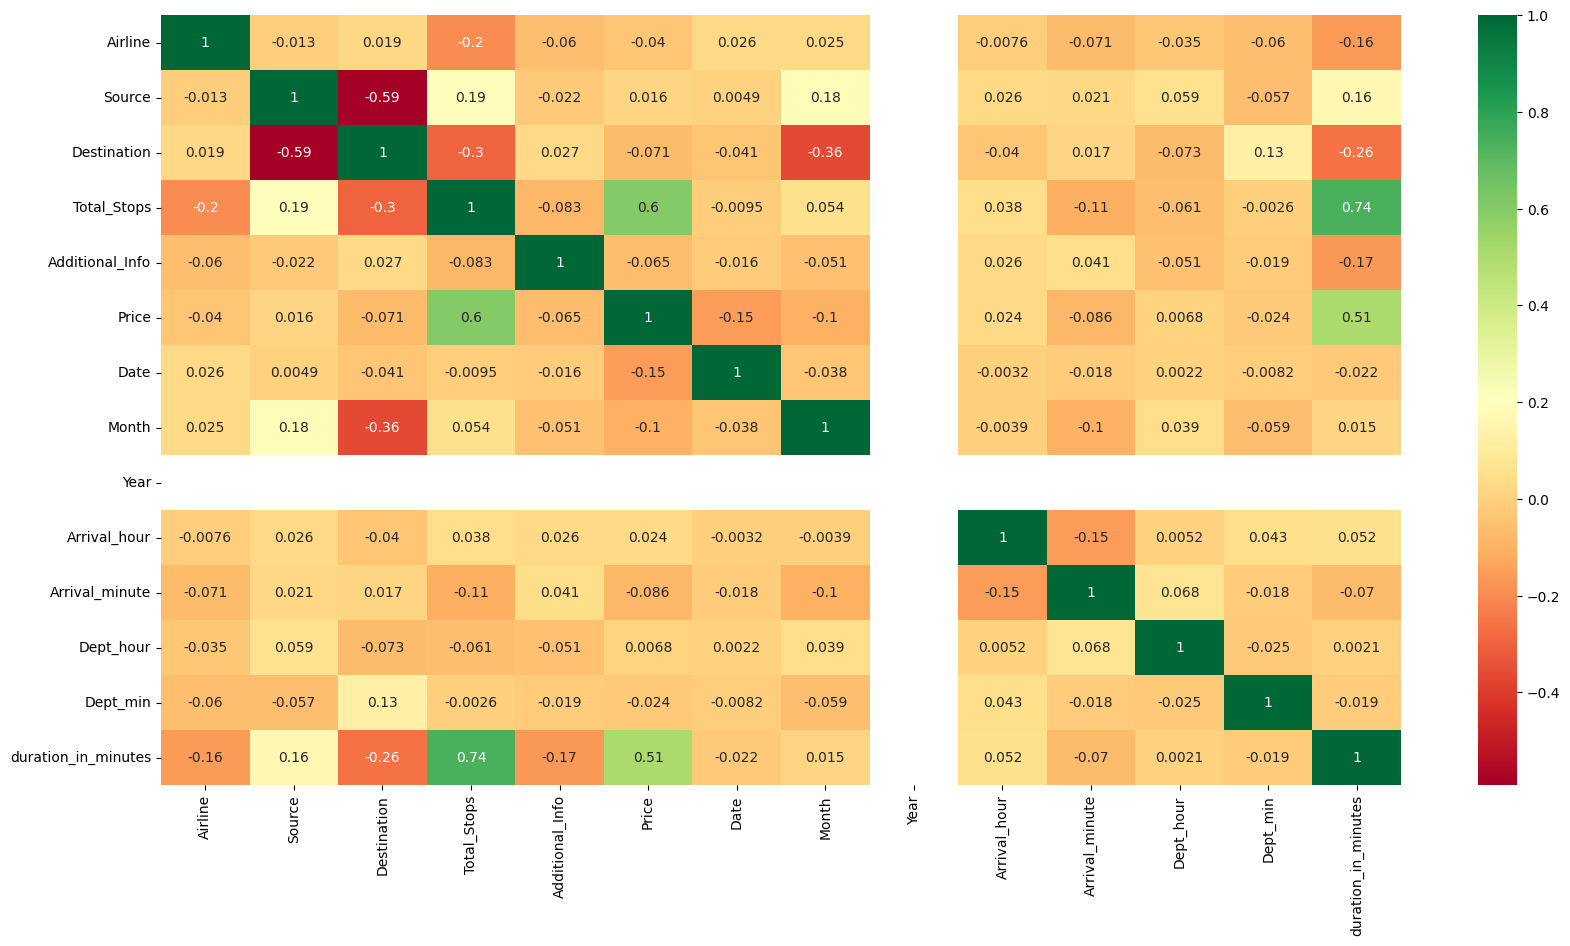

In [837]:
plt.figure(figsize=(20,10))
sns.heatmap(final_df.corr(),annot=True,cmap="RdYlGn")

### Observation
##### Here Good Correlation Variables are:
1. Price - Total_stop
2. Price - duration_in_minutes
3. duraiton_in_minutes - Total_stop


In [838]:
data=final_df.drop(['Price'],axis=1)

In [839]:
train_categorical_data=data.select_dtypes(exclude=['int64','float','int32'])
train_categorical_data
train_numerical_data = data.select_dtypes(include=['int64', 'float','int32'])
train_numerical_data

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_min,duration_in_minutes
0,3,0,5,0.0,8,24.0,3.0,2019.0,1.0,10.0,22.0,20.0,170.0
1,1,3,0,2.0,8,1.0,5.0,2019.0,13.0,15.0,5.0,50.0,445.0
2,4,2,1,2.0,8,9.0,6.0,2019.0,4.0,25.0,9.0,25.0,1140.0
3,3,3,0,1.0,8,12.0,5.0,2019.0,23.0,30.0,18.0,5.0,325.0
4,3,0,5,1.0,8,1.0,3.0,2019.0,21.0,35.0,16.0,50.0,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,1,3,0,0.0,8,27.0,4.0,2019.0,23.0,20.0,20.0,45.0,155.0
10680,4,0,2,0.0,8,27.0,4.0,2019.0,11.0,20.0,8.0,20.0,180.0
10681,10,0,5,0.0,8,1.0,3.0,2019.0,14.0,10.0,11.0,30.0,160.0
10682,1,2,1,2.0,8,9.0,5.0,2019.0,19.0,15.0,10.0,55.0,500.0


## Now we will be splitting out our dataset


In [840]:
print(train_df.shape)
print(test_df.shape)
print(final_df.shape)
## bellow 10462+2671=13133

(10683, 11)
(2671, 10)
(10683, 14)


In [841]:
# Dropping the Price
data = train_df.drop(["Price"], axis=1)

In [842]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info


In [843]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_min,duration_in_minutes
0,3,0,5,0.0,8,3897.0,24.0,3.0,2019.0,1.0,10.0,22.0,20.0,170.0
1,1,3,0,2.0,8,7662.0,1.0,5.0,2019.0,13.0,15.0,5.0,50.0,445.0
2,4,2,1,2.0,8,13882.0,9.0,6.0,2019.0,4.0,25.0,9.0,25.0,1140.0
3,3,3,0,1.0,8,6218.0,12.0,5.0,2019.0,23.0,30.0,18.0,5.0,325.0
4,3,0,5,1.0,8,13302.0,1.0,3.0,2019.0,21.0,35.0,16.0,50.0,285.0


In [844]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10683 entries, 0 to 9039
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              10683 non-null  int32  
 1   Source               10683 non-null  int32  
 2   Destination          10683 non-null  int32  
 3   Total_Stops          10683 non-null  float64
 4   Additional_Info      10683 non-null  int32  
 5   Price                10682 non-null  float64
 6   Date                 10682 non-null  float64
 7   Month                10682 non-null  float64
 8   Year                 10682 non-null  float64
 9   Arrival_hour         10682 non-null  float64
 10  Arrival_minute       10682 non-null  float64
 11  Dept_hour            10682 non-null  float64
 12  Dept_min             10682 non-null  float64
 13  duration_in_minutes  10682 non-null  float64
dtypes: float64(10), int32(4)
memory usage: 1.3 MB


In [845]:
final_df.describe()


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_min,duration_in_minutes
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10682.000000,10682.000000,10682.000000,10682.0,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966957,1.952541,1.436581,0.824113,7.393242,9087.214567,13.509081,4.708575,2019.0,13.349186,24.690601,12.491013,24.409287,643.020502
std,2.353264,1.177591,1.475437,0.675244,1.214459,4611.548810,8.479363,1.164408,0.0,6.859317,16.506808,5.748820,18.767801,507.830133
min,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,5.000000
25%,3.000000,2.000000,0.000000,0.000000,8.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,10.000000,8.000000,5.000000,170.000000
50%,4.000000,2.000000,1.000000,1.000000,8.000000,8372.000000,12.000000,5.000000,2019.0,14.000000,25.000000,11.000000,25.000000,520.000000
75%,4.000000,3.000000,2.000000,1.000000,8.000000,12373.000000,21.000000,6.000000,2019.0,19.000000,35.000000,18.000000,40.000000,930.000000
max,12.000000,5.000000,6.000000,4.000000,10.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,2860.000000


In [846]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [847]:
final_df.tail()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_min,duration_in_minutes
10679,1,3,0,0.0,8,4145.0,27.0,4.0,2019.0,23.0,20.0,20.0,45.0,155.0
10680,4,0,2,0.0,8,7229.0,27.0,4.0,2019.0,11.0,20.0,8.0,20.0,180.0
10681,10,0,5,0.0,8,12648.0,1.0,3.0,2019.0,14.0,10.0,11.0,30.0,160.0
10682,1,2,1,2.0,8,11753.0,9.0,5.0,2019.0,19.0,15.0,10.0,55.0,500.0
9039,12,5,6,0.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [848]:
test_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


##### here top of final_df is train dataset and bottom is test data sets, we can understand from Duration colummn and duration_minite column with train,test is same as final_df

In [849]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [850]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# X_train=sc.fit_transform(X_train)
# X_test=sc.transform(X_test)
# X=sc.fit_transform(X_train)
final_df['Price'].isna().sum()

1

In [851]:
final_df.dropna(inplace=True)

In [852]:
X=final_df.drop('Price',axis=1)
y=final_df['Price']

In [853]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [854]:
from sklearn.linear_model import  LinearRegression

In [855]:
LR=LinearRegression()

In [856]:
LR.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [857]:
LR.fit(X_train,y_train)

LinearRegression()

In [858]:
print(LR.score(X_test, y_test))

0.43399621485007456


In [859]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [860]:
pred=LR.predict(X_test)

In [861]:
mean_absolute_error(pred,y_test)

2483.8028802491854

In [862]:
mean_squared_error(pred,y_test)

12332431.412567263